In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten ,MaxPooling2D, Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
%matplotlib inline

Using TensorFlow backend.


In [ ]:
!pip install kaggle

In [ ]:
!ls

sample_data


In [ ]:
!mkdir .kaggle

In [ ]:
import json
token = {"username":"predator4hack","key":"b9f87e267f4a8d26729edbf8e66392ef"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-06-23 00:53:41          83715  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53          14371  
madeleineferguson/farmers-markets-in-the-united-states      Farmers Markets in the United States                816KB  2020-06-10 16:41:46            407  
mikahama/the-best-sarcasm-annotated-dataset-in-spanish      The Best Sarcasm Annotated Dataset in Spanish        26KB  2020-06-21 16:50:44             42  
shubh0799/churn-modelling                                   Chur

In [ ]:
!kaggle datasets list -s emnist

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
crawford/emnist                                              EMNIST (Extended MNIST)                               1GB  2017-12-20 17:42:58          12300  
tomasramos21/emnist-jpeg                                     EMNIST - JPEG                                       120MB  2019-01-28 16:01:20            163  
vaibhao/handwritten-characters                               HandWritten_Character                                 2GB  2018-09-17 07:07:25            997  
vimpigro/handwritten-mongolian-cyrillic-characters-database  Handwritten Mongolian Cyrillic Characters Database  435MB  2018-10-28 17:56:34            169  
fuckya/emnist                                             

In [ ]:
!kaggle datasets download -d crawford/emnist -p /content

 99% 1.22G/1.24G [00:26<00:00, 69.6MB/s]
100% 1.24G/1.24G [00:26<00:00, 49.6MB/s]


In [ ]:
!unzip \*.zip

Archive:  emnist.zip
  inflating: emnist-balanced-mapping.txt  
  inflating: emnist-balanced-test.csv  
  inflating: emnist-balanced-train.csv  
  inflating: emnist-byclass-mapping.txt  
  inflating: emnist-byclass-test.csv  
  inflating: emnist-byclass-train.csv  
  inflating: emnist-bymerge-mapping.txt  
  inflating: emnist-bymerge-test.csv  
  inflating: emnist-bymerge-train.csv  
  inflating: emnist-digits-mapping.txt  
  inflating: emnist-digits-test.csv  
  inflating: emnist-digits-train.csv  
  inflating: emnist-letters-mapping.txt  
  inflating: emnist-letters-test.csv  
  inflating: emnist-letters-train.csv  
  inflating: emnist-mnist-mapping.txt  
  inflating: emnist-mnist-test.csv   
  inflating: emnist-mnist-train.csv  
  inflating: emnist_source_files/emnist-balanced-test-images-idx3-ubyte  
  inflating: emnist_source_files/emnist-balanced-test-labels-idx1-ubyte  
  inflating: emnist_source_files/emnist-balanced-train-images-idx3-ubyte  
  inflating: emnist_source_files/em

In [ ]:
train = pd.read_csv("emnist-balanced-train.csv",delimiter = ',')
test = pd.read_csv("emnist-balanced-test.csv", delimiter = ',')
mapp = pd.read_csv("emnist-byclass-mapping.txt", delimiter = ' ',index_col=0, header=None, squeeze=True)
print("Train: %s, Test: %s, Map: %s" %(train.shape, test.shape, mapp.shape))

Train: (112799, 785), Test: (18799, 785), Map: (62,)


In [ ]:
train.head()

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.494,0.495,0.496,0.497,0.498,0.499,0.500,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Spliting the data for training and testing
train_x = train.iloc[:,1:]
train_y = train.iloc[:,0]

test_x = test.iloc[:,1:]
test_y = test.iloc[:,0]

In [ ]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(112799, 784) (112799,) (18799, 784) (18799,)


In [ ]:
train_x.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.494,0.495,0.496,0.497,0.498,0.499,0.500,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_y.head()

0    36
1    43
2    15
3     4
4    42
Name: 45, dtype: int64

In [ ]:
train_x = train_x.astype('float32')
train_x /= 255
test_x = test_x.astype('float32')
test_x /= 255

In [ ]:
def rotate(image):
    image = image.reshape(-1,28,1)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

In [ ]:
train_x = np.asarray(train_x)
train_x = np.apply_along_axis(rotate, 1, train_x)
print ("train_x:",train_x.shape)

test_x = np.asarray(test_x)
test_x = np.apply_along_axis(rotate, 1, test_x)
print ("test_x:",test_x.shape)

train_x: (112799, 28, 28, 1)
test_x: (18799, 28, 28, 1)


In [ ]:
train_y.unique()

array([36, 43, 15,  4, 42, 26, 32, 20,  1, 46, 13, 24, 12,  5, 17,  3, 40,
       14, 44, 19, 29, 25, 35, 28, 23, 22, 34,  9, 30, 38, 39, 37, 31, 16,
        7,  2,  8, 10,  6, 27, 45, 33, 11, 18, 41,  0, 21])

In [ ]:
mapp.unique()

array([ 48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122])

In [ ]:
for i in test_y.unique():
  print(chr(mapp[i]))

d
9
Q
i
X
E
B
3
C
G
7
2
R
6
S
j
T
8
4
Z
e
b
L
h
K
1
N
5
P
V
H
Y
0
I
a
c
J
W
D
g
O
A
k
U
F
M
f


In [ ]:
for i in mapp:
  print(chr(i))

0
1
2
3
4
5
6
7
8
9
A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
q
r
s
t
u
v
w
x
y
z


as we can see that some of the letters are missing in the train dataset as some of the small alphabets are similar to big obe so we'll categorise the smaller set of unique elements

In [ ]:
num_classes = train_y.nunique()

In [ ]:
train_y = to_categorical(train_y, num_classes)
test_y = to_categorical(test_y, num_classes)
print("train_y: ", train_y.shape)
print("test_y: ", test_y.shape)

train_y:  (112799, 47)
test_y:  (18799, 47)


In [ ]:
train_x.shape,test_x.shape

((112799, 28, 28, 1), (18799, 28, 28, 1))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, random_state = 21,test_size = 0.2)

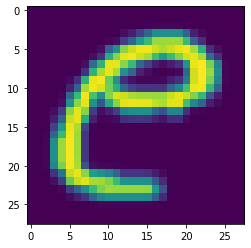

In [ ]:
plt.imshow(X_train[8][:,:,0])

In [ ]:
def generate_model():
    model = Sequential()
    # creating first convolutional layer
    model.add(Conv2D(128, kernel_size = 5, activation = 'relu', input_shape = (28,28,1), padding = 'same'))
    model.add(MaxPooling2D(pool_size = 2))
    
    #creating 2nd convolutional layer
    model.add(Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size = 2))
    
    #creating 3rd convolutional layer
    model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    #fully connected classifier
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = 'softmax'))
    return model

In [ ]:
model = generate_model()
model.summary()

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 32)          18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 288)              

In [ ]:
history = model.fit(train_x, train_y, epochs=10, batch_size=512, verbose=1, validation_data=(X_test, y_test))

Train on 112799 samples, validate on 22560 samples
Epoch 1/10
112799/112799 [==============================] - 17s 149us/step - loss: 1.7715 - accuracy: 0.4968 - val_loss: 0.6235 - val_accuracy: 0.7985
Epoch 2/10
112799/112799 [==============================] - 10s 88us/step - loss: 0.8139 - accuracy: 0.7407 - val_loss: 0.4747 - val_accuracy: 0.8365
Epoch 3/10
112799/112799 [==============================] - 10s 88us/step - loss: 0.6559 - accuracy: 0.7870 - val_loss: 0.4156 - val_accuracy: 0.8554
Epoch 4/10
112799/112799 [==============================] - 10s 88us/step - loss: 0.5827 - accuracy: 0.8079 - val_loss: 0.3911 - val_accuracy: 0.8605
Epoch 5/10
112799/112799 [==============================] - 10s 89us/step - loss: 0.5395 - accuracy: 0.8206 - val_loss: 0.3605 - val_accuracy: 0.8712
Epoch 6/10
112799/112799 [==============================] - 10s 89us/step - loss: 0.5105 - accuracy: 0.8294 - val_loss: 0.3514 - val_accuracy: 0.8729
Epoch 7/10
112799/112799 [======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


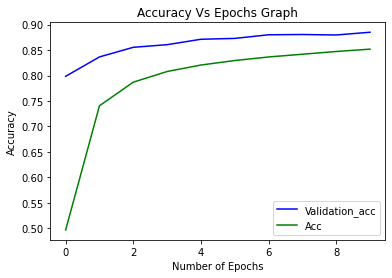

In [ ]:
acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(range(0,10), validation_acc,'b')
plt.plot(range(0,10), acc,'g')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Vs Epochs Graph')
plt.legend(['Validation_acc','Acc'], loc = 'lower_right');

In [ ]:
# predict results
results = model.predict(test_x)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_1.0.csv",index=False)

In [ ]:
!pip install h5py

In [ ]:
from keras.models import model_from_json

#saving the model
model_json = model.to_json()
with open('model.json', 'w') as json_file:
  json_file.write(model_json)

#serialize weights to JSON
model.save_weights('model.h5')

In [ ]:
from keras.models import model_from_yaml

model_yaml = model.to_yaml()
with open('model.yaml', 'w') as yaml_file:
  yaml_file.write(model_yaml)

#serialize weights to JSON
model.save_weights('model_yaml.h5')